<a href="https://colab.research.google.com/github/tayiba-r/tayiba_INFO5731_SPRING2023/blob/main/assignments/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here

# dataset is uploaded in github , using the same link.

import pandas as pd


dataset_csv = pd.read_csv("https://raw.githubusercontent.com/tayiba-r/tayiba_INFO5731_SPRING2023/main/twitter_dataset.csv")
dataset_csv.head()

,Tweet
0,Read Before Buying from Savage x Fenty #savage...
1,@Rihanna #Rihanna please tell your mom Happy B...
2,Check out Rihanna's stunning bikini collection...
3,British Vogue about Rihanna in “The 10 Best Re...
4,NAIL ART INSPIRED BY @SavageXFenty BRALETTE . ...


In [2]:
import re
# cleaning the dataset
def cleantext(tweets):
    cleaned_text = re.sub(r'@[A-Za-z0-9_]+', '', tweets) 
    cleaned_text = re.sub(r'#[A-Za-z0-9_]+', '', cleaned_text) #removing Hashtag symbols.
    cleaned_text = re.sub(r'RT[\s]+', '', cleaned_text) #removing Retweet symbol (RT).
    cleaned_text = re.sub(r'https?:\/\/\S+', '', cleaned_text) #remove URL's.
    cleaned_text = re.sub(r"www.\S+", "", cleaned_text)
    cleaned_text = re.sub('[()!?]', ' ', cleaned_text)
    cleaned_text = re.sub('\[.*?\]',' ', cleaned_text)
    cleaned_text = re.sub("[^A-Za-z0-9]"," ", cleaned_text)#Filtering non-alphanumeric characters
    cleaned_text = re.sub('\\n', '', cleaned_text)#removing the '\n' character
    cleaned_text = re.sub(r'[0-9]+', '', cleaned_text)#removing numbers
    
    return cleaned_text

In [3]:
dataset_csv["Tweet"] = dataset_csv["Tweet"].apply(cleantext)

#Converting the text into lower case
dataset_csv['Tweet']=dataset_csv["Tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [4]:
#removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
dataset_csv['Tweet']=dataset_csv['Tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#Lemmatization
from textblob import Word
nltk.download('wordnet')
dataset_csv['Tweet']=dataset_csv['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
# Copy cleaned dataset into a new csv file
dataset_csv.to_csv("clean_twitter_dataset.csv", index = False)

import nltk
from nltk.util import ngrams

#Create all frequncies of unigrams, bigrams, trigrams for future use in the assignment
clean_dataset = open('clean_twitter_dataset.csv', "r")
unigrams = ngrams(clean_dataset.read().split(), 1)
unigra_freq_dist=nltk.FreqDist(unigrams)
unigra_freq_dist
#creating bigram for future use in the assignment
clean_dataset = open('clean_twitter_dataset.csv', "r")
bigrams = ngrams(clean_dataset.read().split(), 2)
bigra_freq_dist=nltk.FreqDist(bigrams)
bigra_freq_dist

FreqDist({('super', 'bowl'): 90, ('black', 'panther'): 73, ('wakanda', 'forever'): 73, ('panther', 'wakanda'): 70, ('lift', 'black'): 61, ('place', 'th'): 61, ('halftime', 'show'): 46, ('last', 'night'): 35, ('th', 'place'): 29, ('rihanna', 'lift'): 28, ...})

In [7]:
'''(1) Count the frequency of all the N-grams (N=3).'''
#similarly for trigrams: using same methodology
#created trigram frequncies for the whole dataset
clean_data = open('clean_twitter_dataset.csv', "r")
trigrams = ngrams(clean_data.read().split(), 3)
trigra_freq_dist=nltk.FreqDist(trigrams)
trigra_freq_dist


FreqDist({('black', 'panther', 'wakanda'): 70, ('panther', 'wakanda', 'forever'): 70, ('lift', 'black', 'panther'): 61, ('place', 'th', 'place'): 29, ('th', 'place', 'th'): 27, ('rihanna', 'lift', 'black'): 21, ('super', 'bowl', 'halftime'): 19, ('best', 'original', 'song'): 17, ('rihanna', 'super', 'bowl'): 17, ('wakanda', 'forever', 'music'): 16, ...})

In [8]:
'''(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). 
For example, count(really like) / count(really) = 1 / 3 = 0.33.'''
#This is a fucntion which will give probability of  all the bigrams in the dataset using the given formula
def probability_bigram():
    for bigram_values in bigra_freq_dist:
        
        print(("bigram values", bigram_values,"Probability :",bigra_freq_dist[bigram_values]/unigra_freq_dist[(bigram_values[0],)]))

probability_bigram()


Streaming output truncated to the last 5000 lines.
('bigram values', ('news', 'nobody'), 'Probability :', 0.0625)
('bigram values', ('nobody', 'need'), 'Probability :', 0.3333333333333333)
('bigram values', ('need', 'would'), 'Probability :', 0.05555555555555555)
('bigram values', ('love', 'collab'), 'Probability :', 0.015625)
('bigram values', ('collab', 'two'), 'Probability :', 0.3333333333333333)
('bigram values', ('two', 'powerhouse'), 'Probability :', 0.1)
('bigram values', ('powerhouse', 'rihanna'), 'Probability :', 1.0)
('bigram values', ('rihanna', 'climbed'), 'Probability :', 0.003401360544217687)
('bigram values', ('th', 'believe'), 'Probability :', 0.01)
('bigram values', ('believe', 'gonna'), 'Probability :', 0.5)
('bigram values', ('gonna', 'music'), 'Probability :', 0.14285714285714285)
('bigram values', ('music', 'soon'), 'Probability :', 0.010416666666666666)
('bigram values', ('soon', 'biggest'), 'Probability :', 0.25)
('bigram values', ('biggest', 'bitch'), 'Probabili

In [9]:
'''(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the 
fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and 
row name as all the 100 reviews (abstracts, or tweets).'''

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
clean_data = open('clean_twitter_dataset.csv', "r")

_noun = lambda pos: pos[:2] == 'NN'
tokenized = nltk.word_tokenize(clean_data.read())
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if _noun(pos)] 
#displays all the nouns in the clean data

nouns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['Tweet',
 'savage',
 'please',
 'mom',
 'bday',
 'hope',
 'day',
 'rihanna',
 'bikini',
 'collection',
 'print',
 'design',
 'rock',
 'swimsuit',
 'vogue',
 'rihanna',
 'carpet',
 'season',
 'nail',
 'bralette',
 'love',
 'work',
 'clothes',
 'beauty',
 'foundation',
 'clothes',
 'salon',
 'v',
 'matte',
 'press',
 'min',
 'ap',
 'pick',
 'los',
 'studio',
 'suv',
 'lift',
 'panther',
 'wakanda',
 'strength',
 'arm',
 'keep',
 'sound',
 'need',
 'faith',
 'recording',
 'studio',
 'music',
 'rihanna',
 'recording',
 'studio',
 'music',
 'rihanna',
 'recording',
 'studio',
 'music',
 'rihanna',
 'recording',
 'studio',
 'music',
 'reuters',
 'report',
 'output',
 'reduction',
 'amount',
 'oil',
 'demand',
 'rihanna',
 'recording',
 'studio',
 'music',
 'reminder',
 'woman',
 'man',
 'name',
 'accusation',
 'hero',
 'fitness',
 'lesson',
 'future',
 'circumstance',
 'way',
 'billionaire',
 'learn',
 'ep',
 'rebel',
 'ring',
 'carat',
 'pear',
 'diamond',
 'botswana',
 'amp',
 'gold',
 't

In [10]:
#or other way
import nltk
nltk.download('brown')
clean_data = open('clean_twitter_dataset.csv', "r")
#print(clean_data)
blob = TextBlob(clean_data.read())
noun_phrases = blob.noun_phrases
print(noun_phrases) #to print all the noun phrases from the clean dataset

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['tweet', 'savage x fenty', 'happy bday navy hope', 'great day check rihanna', 'bikini collection bold print sleek design', 'rock swimsuit british vogue rihanna', 'red carpet look award season nail', 'work clothes fenty beauty foundation clothes', 'nail salon glossy v matte cute press', 'beau ap rocky', 'los angeles studio', 'flashy yellow suv', 'black panther wakanda', 'strength arm', 'safe sound need', 'light need', 'christian faith pregnant', 'ap rocky', 'new music pregnant pregnant rihanna', 'ap rocky', 'new music pregnant pregnant rihanna', 'ap rocky', 'new music pregnant pregnant rihanna', 'ap rocky', 'new music reuters', 'total output reduction', 'global oil demand pregnant rihanna', 'ap rocky', 'new music aprocky reminder woman', 'hater man', 'false accusation queen hero top', 'financial fitness lesson past dictate', 'circumstance stand way', 'ep rebel', 'black ring carat pear', 'diamond botswana amp', 'black ceramic gold thelma', 'part crown couture exhibition opening april th

In [11]:
df_noun = pd.DataFrame(noun_phrases, columns = ['noun_phrases'])
df_noun # adding the noun phrases to the data frame

import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

clean_data = open('clean_twitter_dataset.csv', "r")
f = nltk.FreqDist(noun_phrases)
f # gives the frequncy of noun phrases


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


FreqDist({'black panther wakanda': 70, 'super bowl': 23, 'place th place th': 9, 'time show': 8, 'super bowl performance': 7, 'black woman': 6, 'original song': 6, 'super bowl halftime show': 6, 'ap rocky': 5, 'red carpet': 5, ...})

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [12]:
import pandas as pd
import numpy as np

# Calculate term frequency (TF)
tf_result = (dataset_csv['Tweet']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_result.columns = ['tweet_words', 'tf']

# Calculate inverse document frequency (IDF)
N = dataset_csv.shape[0]  # Total number of documents
for i, word in enumerate(tf_result['tweet_words']):
    df = len(dataset_csv[dataset_csv['Tweet'].str.contains(word)])  # Number of documents containing the word
    idf = np.log(N / df)
    tf_result.loc[i, 'idf'] = idf

# Calculate term frequency-inverse document frequency (TF-IDF)
tf_result['tf_idf'] = tf_result['tf'] * tf_result['idf']

# Display the results
tf_result.head()


,tweet_words,tf,idf,tf_idf
0,read,18.0,3.411248,61.402459
1,buying,1.0,6.907755,6.907755
2,savage,4.0,5.521461,22.085844
3,x,10.0,1.931022,19.310215
4,fenty,16.0,4.135167,66.162665


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA

# Convert train set and test set to lists
tn_set = dataset_csv['Tweet'].values.tolist()
tt_set = ["black life matter everyone going get result sort look like result design sad"]

# Load stop words
stopWords = stopwords.words('english')

# Create CountVectorizer and TfidfTransformer
vectorizer = CountVectorizer(stop_words=stopWords)
transformer = TfidfTransformer()

# Transform train set and test set to vector arrays
tnVectorizerArray = vectorizer.fit_transform(tn_set).toarray()
ttVectorizerArray = vectorizer.transform(tt_set).toarray()

# Calculate cosine similarity
cx = lambda a, b: np.inner(a, b) / (LA.norm(a) * LA.norm(b))
cosine_values = [cx(vector, testV) for vector in tnVectorizerArray for testV in ttVectorizerArray]

# Create DataFrame with cosine similarity results
df_result = dataset_csv.filter(['Tweet'], axis=1)
df_result['Cosine_similarity'] = cosine_values

# Display the results
df_result


<ipython-input-13-cc6e59a41709>:23: RuntimeWarning: invalid value encountered in true_divide
  cx = lambda a, b: np.inner(a, b) / (LA.norm(a) * LA.norm(b))


,Tweet,Cosine_similarity
0,read buying savage x fenty,0.000000
1,please tell mom happy bday navy hope great day,0.000000
2,check rihanna stunning bikini collection bold ...,0.074125
3,british vogue rihanna best red carpet look awa...,0.089087
4,nail ainspired bralette love work clothes fent...,0.000000
...,...,...
995,major highlight rihanna performance super bowl...,0.000000
996,seems like thing getting riri photo album rela...,0.080582
997,showtime another eventful weekend football pre...,0.000000
998,find talent vault offer selection top candidat...,0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [14]:
!pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
from gensim.models import Word2Vec

# Load CSV file
df = pd.read_csv("clean_twitter_dataset.csv")

# Convert text column to string and drop any NaN values
df['Tweet'] = df['Tweet'].astype(str).dropna()

# Preprocess data and create list of sentences
list_of_sentences = [sentence.split() for sentence in df['Tweet']]

# Train Word2Vec model
model = Word2Vec(sentences=list_of_sentences, vector_size=300, window=5, min_count=5, workers=4)

# Access the vocabulary of the trained Word2Vec model
words = list(model.wv.index_to_key)
words


['rihanna',
 'performance',
 'song',
 'black',
 'show',
 'th',
 'lift',
 'super',
 'music',
 'place',
 'bowl',
 'amp',
 'forever',
 'wakanda',
 'panther',
 'oscar',
 'one',
 'like',
 'year',
 'love',
 'halftime',
 'last',
 'best',
 'night',
 'time',
 'pregnant',
 'get',
 'new',
 'woman',
 'still',
 'day',
 'u',
 'look',
 'people',
 'got',
 'baby',
 'today',
 'made',
 'perform',
 'nominated',
 'girl',
 'via',
 'world',
 'see',
 'album',
 'away',
 'red',
 'stage',
 'march',
 'award',
 'amazing',
 'would',
 'back',
 'valentine',
 'live',
 'happy',
 'first',
 'game',
 'said',
 'man',
 'make',
 'want',
 'good',
 'win',
 'learn',
 'say',
 'great',
 'go',
 'moment',
 'star',
 'also',
 'take',
 'really',
 'singer',
 'single',
 'academy',
 'carpet',
 'hit',
 'diamond',
 'better',
 'rocky',
 'st',
 'original',
 'know',
 'brand',
 'inspired',
 'way',
 'fan',
 'home',
 'dance',
 'week',
 'everyone',
 'dancer',
 'riri',
 'superbowl',
 'old',
 'thing',
 'another',
 'artist',
 'favorite',
 'read',
 '

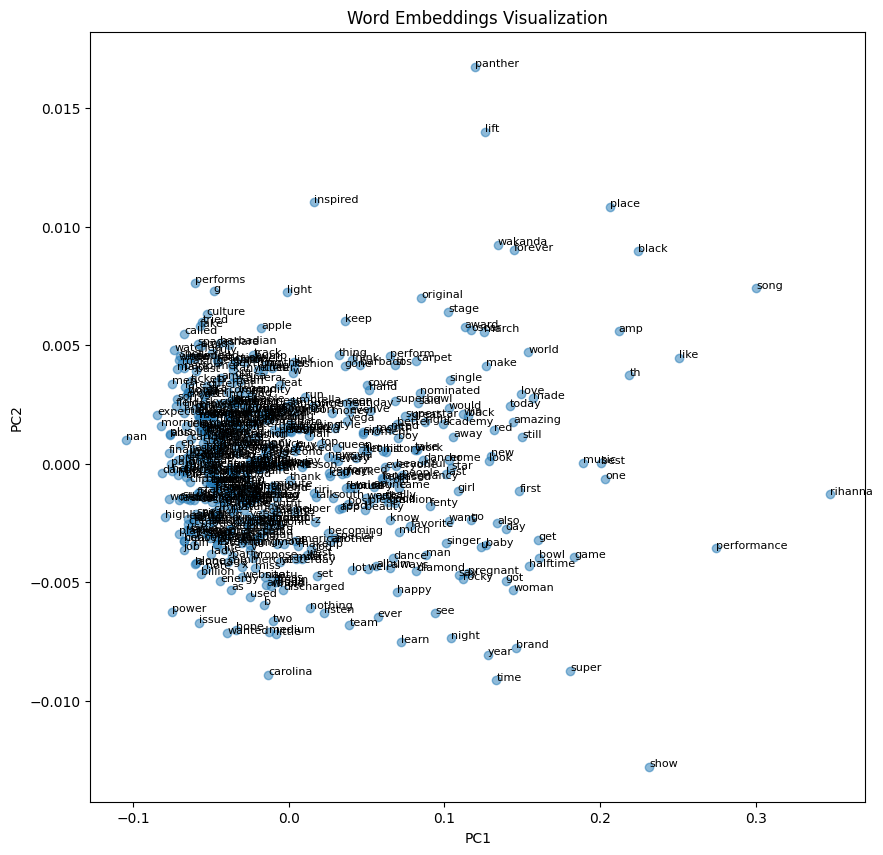

In [16]:
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load CSV file
df = pd.read_csv("clean_twitter_dataset.csv")

# Convert text column to string and drop any NaN values
df['Tweet'] = df['Tweet'].astype(str).dropna()

# Train Word2Vec model
model = Word2Vec(sentences=df['Tweet'].str.split(), vector_size=300, window=5, min_count=5, workers=4)

# Perform PCA to reduce dimensionality of word embeddings to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(model.wv.vectors)

# Plot word embeddings in 2D
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o', alpha=0.5)
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Word Embeddings Visualization')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [18]:
'''import nltk
nltk.download('vader_lexicon')'''

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
'''import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load tweets data from CSV file
tweets_data = pd.read_csv('clean_twitter_dataset.csv')

# Convert 'clean_text' column to string
tweets_data['Tweet'] = tweets_data['Tweet'].astype(str)

# Create a new DataFrame to store the annotated data
annotated_data_df = pd.DataFrame(columns=['document_id', 'clean_text', 'sentiment'])

# Loop through each tweet and annotate sentiment
for i, row in tweets_data.iterrows():
    tweet = row['Tweet'].encode('utf-8').decode('ascii', 'ignore')  # Encoding with utf-8 and decoding with ascii
    sentiment = sid.polarity_scores(tweet)
    if sentiment['compound'] > 0:
        sentiment_label = 'positive'
    elif sentiment['compound'] < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    annotated_data_df = annotated_data_df.append({'document_id': i+1,
                                                  'clean_text': tweet,
                                                  'sentiment': sentiment_label}, ignore_index=True)

# Save the annotated data into a new CSV file
annotated_data_df.to_csv('annotated_data.csv', index=False)
'''

<ipython-input-25-9cf6f1586119>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotated_data_df = annotated_data_df.append({'document_id': i+1,
<ipython-input-25-9cf6f1586119>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotated_data_df = annotated_data_df.append({'document_id': i+1,
<ipython-input-25-9cf6f1586119>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotated_data_df = annotated_data_df.append({'document_id': i+1,
<ipython-input-25-9cf6f1586119>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotated_data_df = annotated_data_df.append({'document_id': i+1,
<ipython-input-25-9cf6f1586119>:27: FutureWarning: T

In [29]:
# The GitHub link of your final csv file


# Link: https://github.com/tayiba-r/tayiba_INFO5731_SPRING2023/blob/main/datasets/annotated_dataset.csv

'https://github.com/tayiba-r/tayiba_INFO5731_SPRING2023/blob/main/datasets/annotated_dataset.csv'



'https://github.com/tayiba-r/tayiba_INFO5731_SPRING2023/blob/main/datasets/annotated_dataset.csv'